# Part - 1 Input image + Input Encrypted File Message = > Encrypted Image

# 1 Input Image and File input

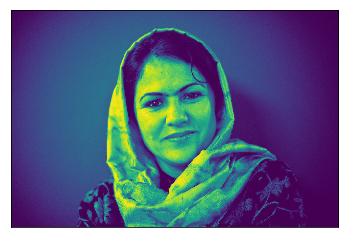

qwertyuiopasdfghjklzxcvbnm,./

['q', 'w', 'e', 'r', 't', 'y', 'u', 'i', 'o', 'p', 'a', 's', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'z', 'x', 'c', 'v', 'b', 'n', 'm', ',', '.', '/', '\n']
message is resized to image dimensions= 83000


In [9]:
import cv2
from matplotlib import pyplot as plt 
image = cv2.imread('images/fawzia.jpg')
image= cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image=cv2.resize(image, (1000,664))
height_image= len(image)
width_image= len(image[0])

plt.imshow(image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

f=open("srikar.txt", "r")
content=f.read()
print(content)
content=list(content)
print(content)

message_extended=[]
y=0
for x in range(int((height_image*width_image)/8)):
    message_extended.append(content[y])
    y=y+1
    if y==len(content):
        y=0
    
    
print("message is resized to image dimensions=",len(message_extended))

# 2 ADD  message to 16bit image

In [2]:
def Encrypted_16bit_Image(array_8pixels,message_Input):
    s = message_Input
    #print(s)
    #c=[ord(x) for x in s]
    c=ord(s)
    #z=[[255,5,151,150,1,21,5,7],[255,5,151,150,1,21,5,7]]
    z=array_8pixels
    #print(c)
    def change_least2_bit(a,c):
        number_of_bits = 16
        get_bin = lambda x, n: format(x, 'b').zfill(n)
        a=get_bin(a, number_of_bits)
        a=list(a)
        length=len(a)
        count=-1
        for x in a:
            count=count+1
            if count==length-2:
                a[count]=c[0]          
            if count==length-1:
                a[count]=c[1]          
        a=''.join(a)
        return int(a,2)
    def divide_8bit_Message(z,c):
        number_of_bits = 16
        get_bin = lambda x, n: format(x, 'b').zfill(n)
        a=get_bin(c, number_of_bits)
        a=list(a)
        kl=[0,0,0,0,0,0,0,0]
        #print(a)
        count1=0
        count2=0
        for x in range(len(kl)):
            j=[a[count1],a[count1+1]]
            j=list(j)
            kl[x]=change_least2_bit(z[x],j)
            count1=count1+2      
        return kl
    df= divide_8bit_Message(z,c)
    return df

#asd=[255,5,151,150,1,21,5,7]
#msgg='h'
#fgh=Encrypted_16bit_Image(asd,msgg)
#print(fgh)

(664, 1000)


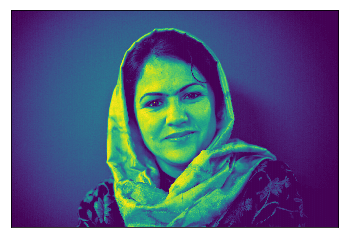

True

In [3]:
A=[0,0,0,0,0,0,0,0] #Dividing Image to 8 pixels batch for one letter 
w, h = width_image, height_image;
z = [[0 for x in range(w)] for y in range(h)] 
count1=0
count2=0
count3=0
for i in range(h):
    for j in range(w):
        A[count1]=image[i][j]
        count1=count1+1
        if count1==8:
            #count3=count3+1
            #m=C[count3]
            #B=bit_8_array(A,m)
            #print(A)
            
            B=Encrypted_16bit_Image(A,message_extended[count3])
            count3=count3+1
            for k in range(len(B)):
                z[i][count2]=B[k]
                count2=count2+1
            
            count1=0
    count2=0        
        
        
        
#print(z)

#print(type(z))

import numpy as np
Encrypted_image=np.asarray(z)
print(Encrypted_image.shape)
plt.imshow(Encrypted_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
cv2.imwrite("non_Encrypted_image.jpg",image)
cv2.imwrite("Encrypted_image.jpg",Encrypted_image)

# Part -2 Encrypted Image - Input image => Input Encrypted File Message 

# 1- substraction

In [4]:
def Decoded_message(Encrypted_image_8Pixels):
    fd=Encrypted_image_8Pixels
    def least_bit_sequence(fd):
        number_of_bits = 16
        get_bin = lambda x, n: format(x, 'b').zfill(n)
        fd=get_bin(fd, number_of_bits)
        fd=list(fd)
        kj=[fd[len(fd)-2],fd[len(fd)-1]]
        #print(kj)
        return kj
    
    def message_extract(fd):
        count4=0
        message=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        for x in range(len(fd)):
            ok=least_bit_sequence(fd[x])
            message[count4]=ok[0]
            count4=count4+1
            message[count4]=ok[1]
            count4=count4+1
        message=''.join(message)
        return int(message,2)
    message1=message_extract(fd)
    string=chr(message1)
    return string

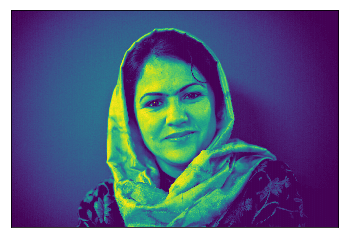

In [5]:
plt.imshow(Encrypted_image)
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

A=[0,0,0,0,0,0,0,0] #Dividing Image to 8 pixels batch for one letter 
w, h = width_image, height_image;
z = [[0 for x in range(w)] for y in range(h)]
Message_Decoded_output=[]
count1=0
for i in range(h):
    for j in range(w):
        A[count1]=Encrypted_image[i][j]
        count1=count1+1
        if count1==8:
            Message_Decoded_output.append(Decoded_message(A))
            count1=0
            
#print(Message_Decoded_output)

# 2- Decoded Message

In [6]:
Message_Output=[]
for x in range(len(content)):
    Message_Output.append(Message_Decoded_output[x])

Message_Output=''.join(Message_Output)
print(Message_Output)

f= open("Vineel.txt","w+")
f.write(Message_Output)
f.close()

qwertyuiopasdfghjklzxcvbnm,./

